In [47]:
from sklearn.linear_model import Ridge, Lasso
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import random
from numpy import array, dot, transpose
from numpy.linalg import inv
import copy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics
import itertools
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# imports
import sklearn.linear_model as linear_model
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
# from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.model_selection import train_test_split

## 5

### a

In [382]:
def simulateData(n):
    x = np.zeros(shape=(n, 3))
    y = np.zeros(shape=n)
    
    x[:,0] = 1
    x[:,1] = np.random.uniform(0, 3, size = n)
    x[:,2] = np.random.uniform(0, 3, size = n)
    
    for i in range(0, n):
        bernoulli = (1 + np.exp(-(-3 + (x[i][1]) + (x[i][2]))))
        y[i] =  1/bernoulli

    y = np.array([1 if i > 0.5 else 0 for i in y])
    return y, x

In [ ]:
## TODO
data_simulation=function(n) { 
x1<-runif(n,0,3) 
x2<-runif(n,0,3)
y<-rep(0,length(x1)) for (i in 1:length(x1)) { 
y[i]<-rbinom(1,1,1/(1+exp(-(-3+x1[i]+x2[i])))) } 
data=data.frame(y,x1,x2) 
return(data) }

In [383]:
y, x = simulateData(50)

In [408]:
print(x,y)

[[ 1.          2.25701772  0.12609303]
 [ 1.          0.94144445  2.76250449]
 [ 1.          0.67542834  2.01885212]
 [ 1.          2.04398333  0.75655789]
 [ 1.          0.0154088   1.6399685 ]
 [ 1.          2.48612741  2.76200764]
 [ 1.          2.63412396  2.696021  ]
 [ 1.          2.96089052  1.94313583]
 [ 1.          1.20064089  2.31150741]
 [ 1.          1.14418025  0.87252929]
 [ 1.          2.65321903  1.72979525]
 [ 1.          2.56629749  2.05466716]
 [ 1.          1.69543958  0.4411594 ]
 [ 1.          2.10424364  1.68501884]
 [ 1.          0.63422804  2.10894857]
 [ 1.          0.20207023  0.62516452]
 [ 1.          2.75718982  0.52615462]
 [ 1.          0.30082348  0.03782593]
 [ 1.          2.36545071  2.73863007]
 [ 1.          2.12185183  0.59014664]
 [ 1.          0.05395946  0.52908558]
 [ 1.          2.30257834  1.61310515]
 [ 1.          1.58691497  1.87556623]
 [ 1.          0.09782289  2.38957668]
 [ 1.          1.57727013  0.32502114]
 [ 1.          2.56845075

### b

In [388]:
# batch gradient descent

def batchGD(x, y, n, theta, rows, alpha):
    """
    n : no. of iterations
    """
    xT = x.transpose()
    for _ in range(0, n):        
        cost = (1 / (1 + np.exp(-(1 + (np.dot(x, theta)))))) - y
        grad = np.dot(xT, cost) / rows
        theta = theta - alpha * grad
    return theta

In [390]:
rows, b = np.shape(x)
n_i = 5000
theta_ = np.ones(b)
theta = batchGD(x, y, n_i, theta_, rows, .08)
print(theta)

[-10.9263461    3.35862297   3.15542621]


In [391]:
# stochastic gradient descent

## come back later

In [434]:
def stochasticGD(x, y, n, theta, rows, alpha, delta=2):
    """
    n: no. of iterations
    c: count
    """
    xT = x.transpose()
    c = 0
    theta_0 = theta + delta + 1
    while (c < n):
            c += 1
            for i in range(rows):
                hypothesis = (x[i][0] * theta[0]) + (x[i][1] * theta[1]) + (x[i][2] * theta[2])
                cost = 1/(1 + np.exp(- hypothesis)) - y[i]
                gradient_0 = x[i][1] * cost
                gradient_1 = x[i][0] * cost
                theta_0 = theta
                theta[1] -= alpha * gradient_0
                theta[0] -= alpha * gradient_1
    return theta

In [433]:
rows, b = np.shape(x)
n_i = 10000
theta_ = np.ones(b)
theta = stochasticGD(x, y, n_i, theta_, rows, .08)
print(theta)

[-4.78550049  2.22915083  1.        ]


## 6

In [3]:
df = pd.read_csv("data/hw3_dataset.txt", delim_whitespace=True)

In [4]:
df.head()

,id,vc_funding,face_value,n_shares,buyout
0,1,0,1200000,3000000,0
1,2,0,1454000,1454000,1
2,3,0,1500000,300000,0
3,4,0,1530000,510000,0
4,5,0,2000000,800000,0


In [5]:
# let's drop id column since it's a unique identifier.
df = df.drop('id', axis=1)
df.head()

,vc_funding,face_value,n_shares,buyout
0,0,1200000,3000000,0
1,0,1454000,1454000,1
2,0,1500000,300000,0
3,0,1530000,510000,0
4,0,2000000,800000,0


In [6]:
# check for missing quantities
# let's drop id column since it's a unique identifier.
df = df.drop('id', axis=1)
df.head()
missing = df.isnull().sum()
print(missing)

vc_funding    0
face_value    0
n_shares      0
buyout        0
dtype: int64


There are no missing values.

### a

In [301]:
def train_validate_test_split(df, train_percent=.38, validate_percent=.38, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [302]:
train, validate, test = train_validate_test_split(df, .34, .34)
print(len(train))
print(len(validate))
print(len(test))

163
163
156


Train, validation and test sets created of roughly equal size.

Let's check out some statistics about the dataset:

In [303]:
df.describe()

,vc_funding,face_value,n_shares,buyout
count,482.000000,4.820000e+02,4.820000e+02,482.000000
mean,0.439834,2.651672e+07,2.227942e+06,0.093361
std,0.496883,2.632174e+07,1.413872e+06,0.291240
min,0.000000,1.200000e+06,3.000000e+05,0.000000
25%,0.000000,1.025000e+07,1.300000e+06,0.000000
50%,0.000000,1.950000e+07,2.000000e+06,0.000000
75%,1.000000,3.250000e+07,2.700000e+06,0.000000
max,1.000000,2.346000e+08,1.101862e+07,1.000000


In [77]:
X_train = train.drop('vc_funding', axis=1)
y_train = train["vc_funding"]
X_validate = validate.drop('vc_funding', axis=1)
y_validate = validate["vc_funding"]
X_test = test.drop('vc_funding', axis=1)
y_test = test["vc_funding"]

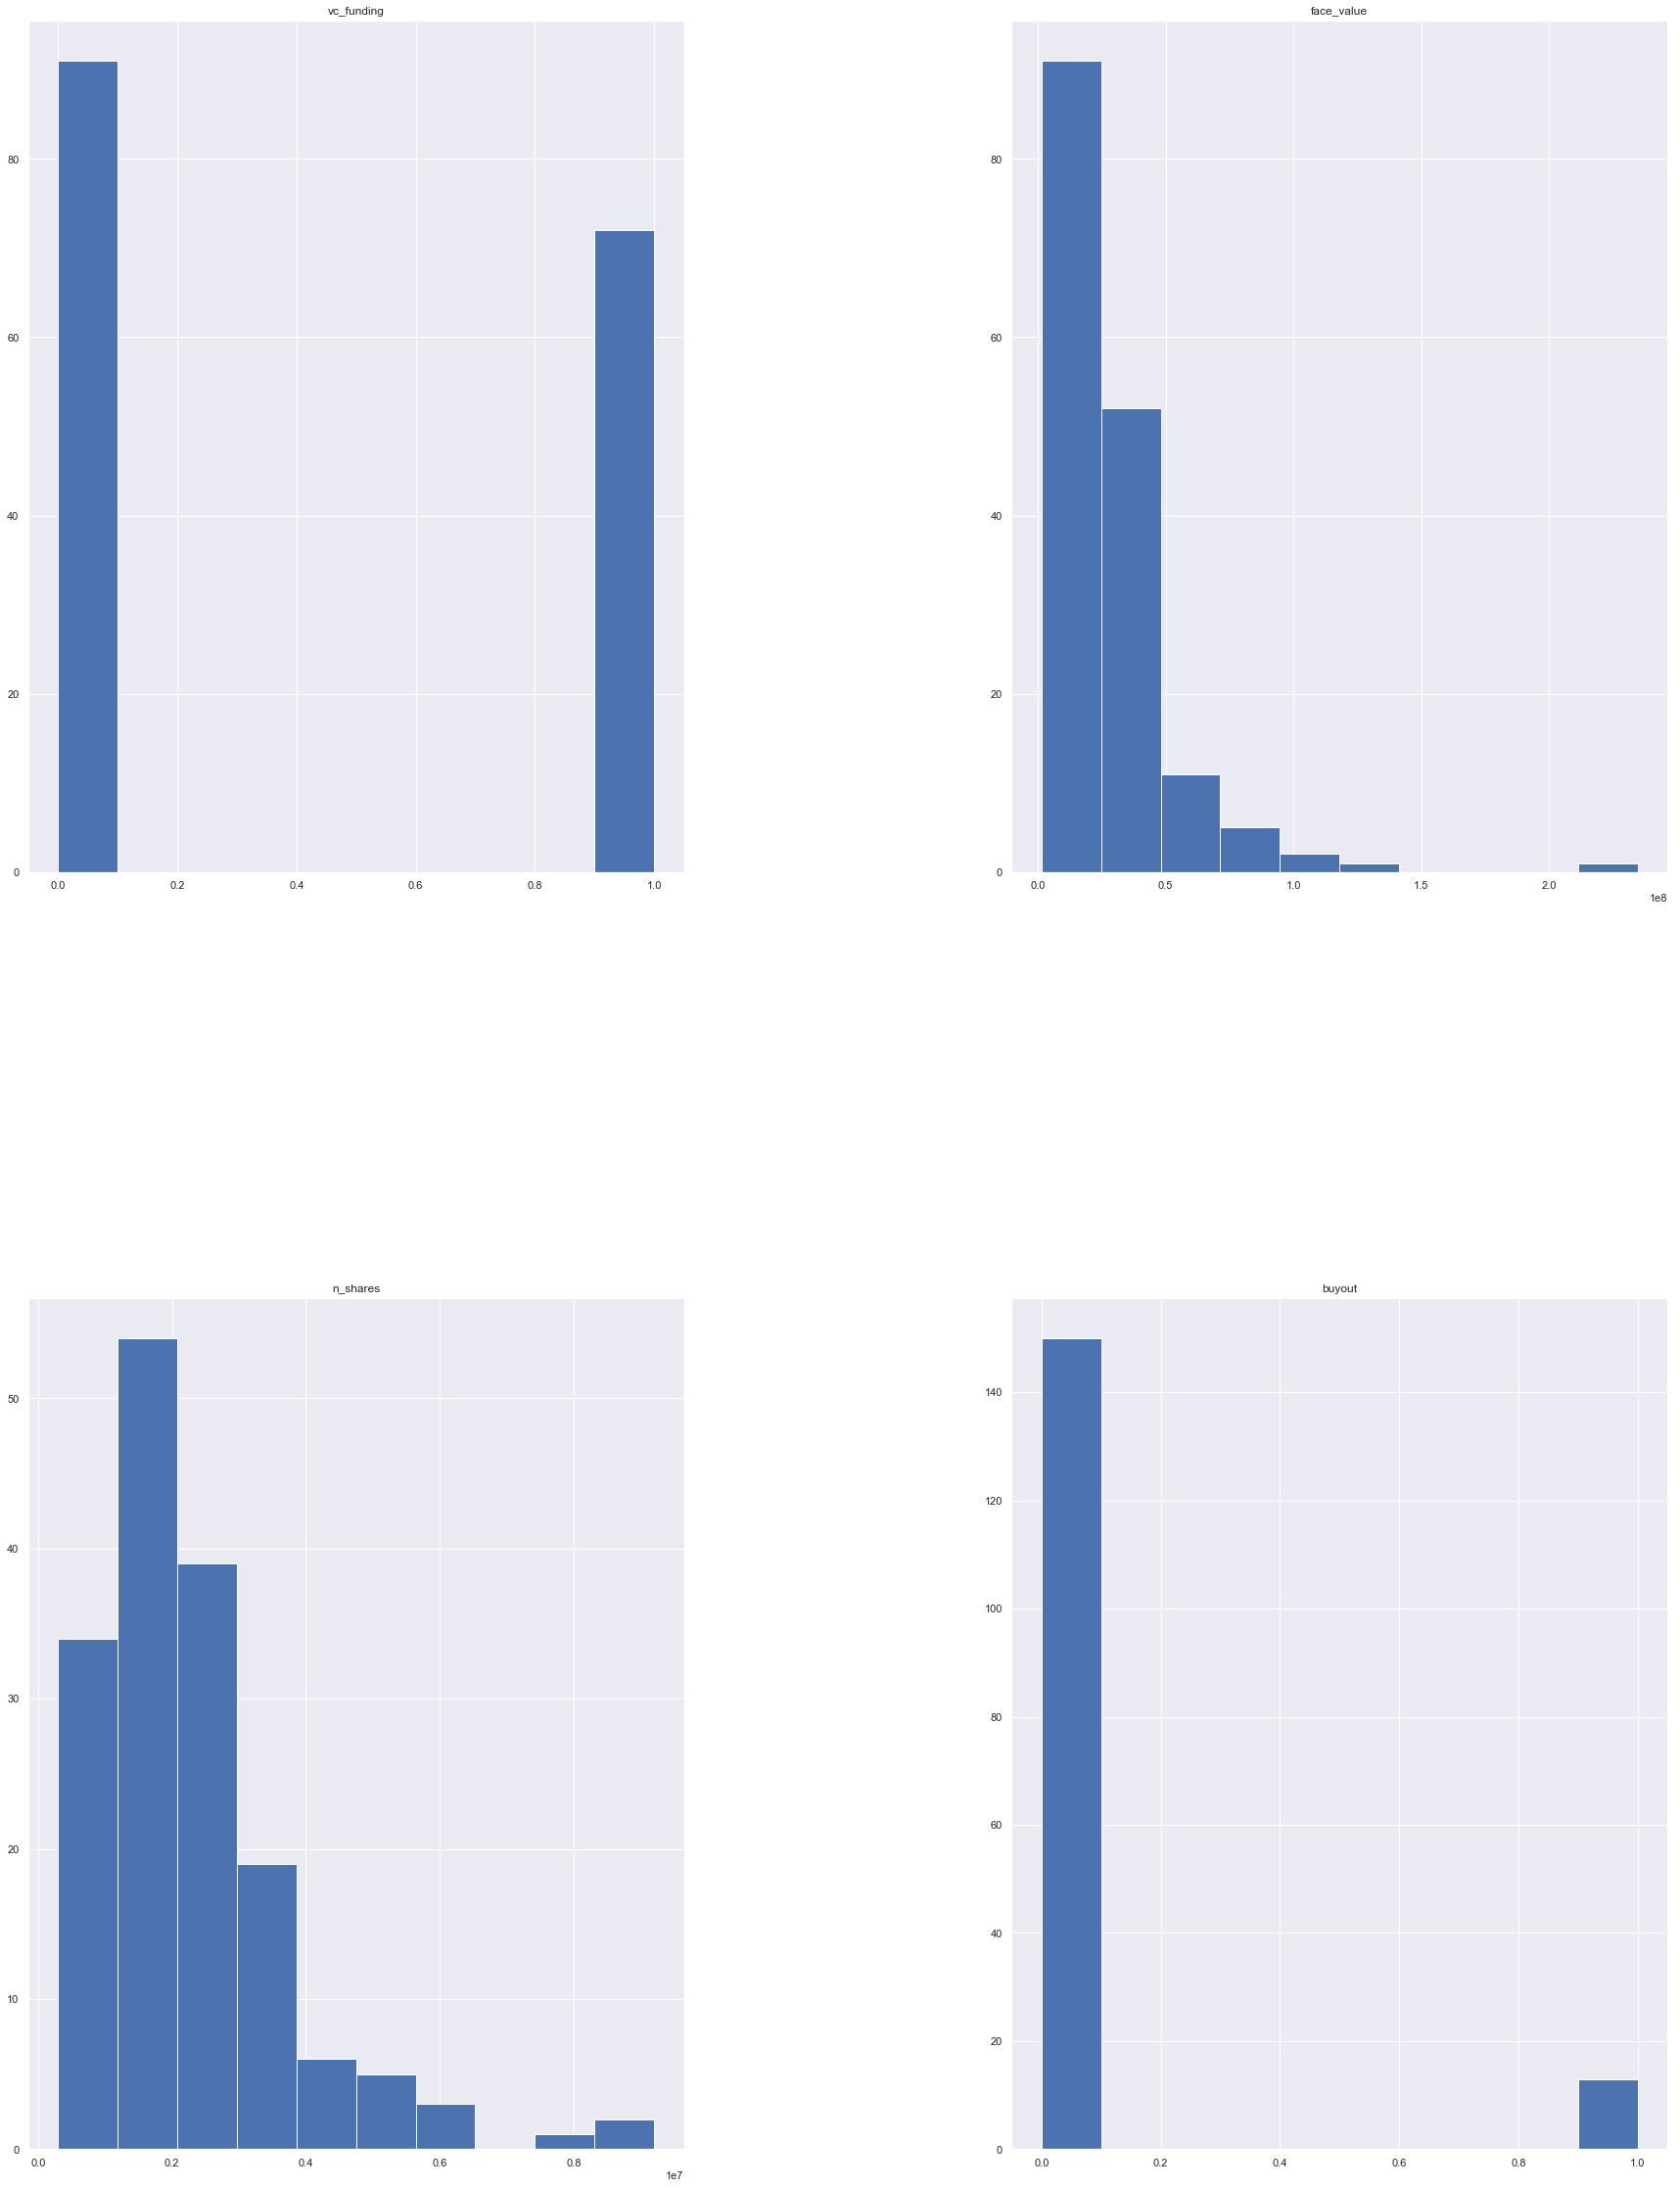

In [17]:
fig, axs = plt.subplots(2,2, figsize=(30, 40), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()

for i,j in enumerate(train.columns):
    axs[i].hist(train[j])
    axs[i].set_title(j)

#### Inference:

There's roughly an equal number of companies with and without vc_funding in this dataset.  
n_shares and face_value are both positively skewed. We'll perform feature transformation on these features later before applying logistic regression.

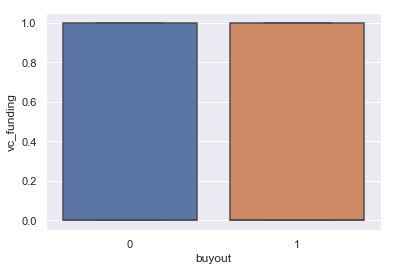

In [254]:
sns.boxplot(train['buyout'], train['vc_funding'])

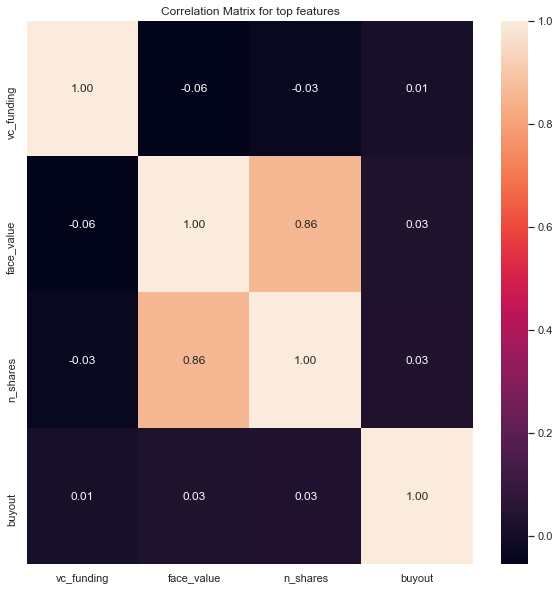

In [25]:
corr = train.corr()
max_corr = (abs(corr) - np.identity(corr.shape[0])).max()
top_features = max_corr[max_corr > 0].index
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr.loc[top_features, top_features], annot=True,fmt='.2f',ax=ax)
plt.title("Correlation Matrix for top features")
plt.show()

#### Inference:

n_shares and face_value are highly correlated. This implies that we should either use only of them or somehow combine them. Later, we will multiply both the quantities. Other than that, we don't see much correlation between any features or the target.

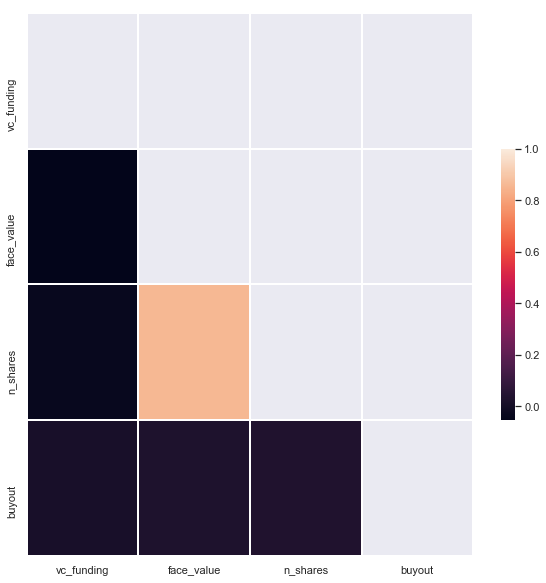

In [23]:
corr = train.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (10, 10))
sns.heatmap(corr, mask = mask, xticklabels = 1, 
            yticklabels = 1, linewidths = 1, cbar_kws = {"shrink": .5})

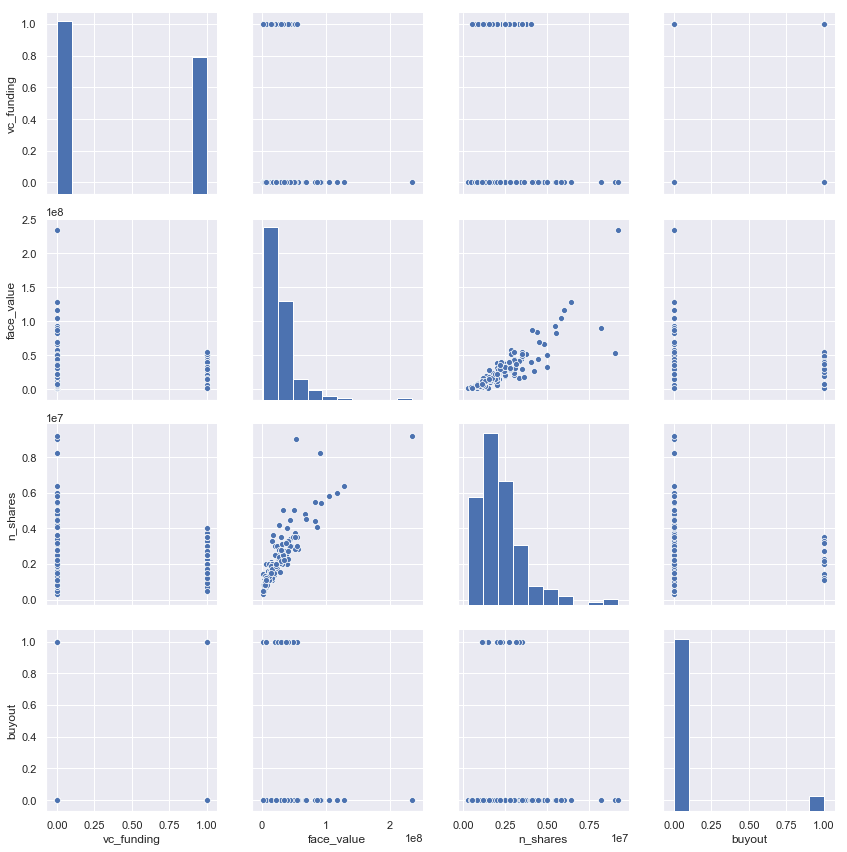

In [24]:
sns.pairplot(train, height = 3, vars=train.columns)
plt.show()

The seaborn pairplots show as pari-wise scatter plots of all predictors.

In [93]:
X_train.head()

,face_value,n_shares,buyout,capital
303,26650000,2050000,0,31.631650
323,28750000,2875000,0,32.045712
179,14700000,2100000,0,31.060806
208,16625000,1750000,0,31.001544
276,23100000,2100000,0,31.512791


Transforming the features:
Creating a new predictor, capital, by multiplying face_value and n_shares.

In [97]:
X_train['capital'] = np.log(X_train['face_value'] * X_train['n_shares'])
X_validate['capital'] = np.log(X_validate['face_value'] * X_validate['n_shares'])
X_test['capital'] = np.log(X_test['face_value'] * X_test['n_shares'])

# didn't run this for now
X_train['fvl'] = np.log(X_train.face_value)
X_train['nsl'] = np.log(X_train.n_shares)

X_validate['fvl'] = np.log(X_validate.face_value)
X_validate['nsl'] = np.log(X_validate.n_shares)

X_test['fvl'] = np.log(X_test.face_value)
X_test['nsl'] = np.log(X_test.n_shares)

# PRED = ['fvl', 'nsl']

### b

In [27]:
# just fitting randomly
clf = linear_model.LogisticRegression(C=1e12, random_state=0)
clf.fit(X_train, y_train)
print(clf.intercept_, clf.coef_)

[ -3.56532699e-12] [[ -9.66120441e-13   6.38014322e-08  -1.81126765e-06]]


#### Logistic Regression pipeline

In [365]:
def lr_pipeline(X_train, y_train, PRED, X_test, y_test, solver='lbfgs'):

    # PRED: features to be used for the model

    clf = LogisticRegression(solver=solver)
    clf.fit(X_train[PRED], y_train)
    clf.get_params()
    # predict
    pred = clf.predict(X_test[PRED])
    # confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test, pred)
    print(cnf_matrix)

    # visualize the confusion matrix
    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()

    plt.title('Confusion matrix', y=1.2)
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # plot roc-auc curve
    
#     y_pred_proba = logreg.predict_proba(X_test[PRED])[::,1]
#     fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#     auc = metrics.roc_auc_score(y_test, y_pred_proba)
#     plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#     plt.legend(loc=4)
#     plt.show()


    
    probabilities = t.predict_proba(X_test[PRED])
    pred_ = probabilities[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred_)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('ROC-AUC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()

    # print the metrics
    print("Accuracy:", metrics.accuracy_score(y_test, pred))
    print("Precision:", metrics.precision_score(y_test, pred))
    print("Recall:", metrics.recall_score(y_test, pred))

    return pred

[[92  0]
 [64  0]]


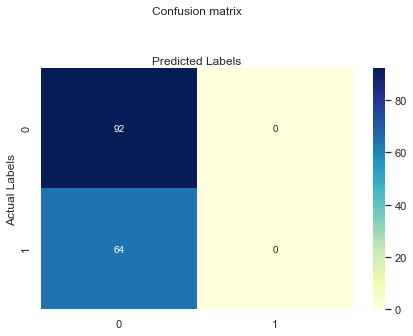

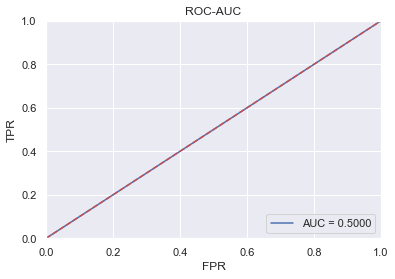

Accuracy: 0.589743589744
Precision: 0.0
Recall: 0.0


/opt/anaconda/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [366]:
pred = lr_pipeline(X_train, y_train, ['n_shares','face_value'], X_test, y_test, solver='lbfgs')

[[72 20]
 [48 16]]


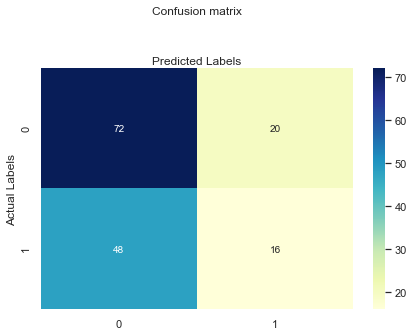

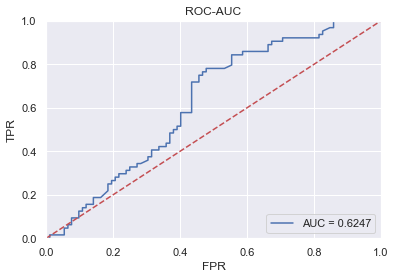

Accuracy: 0.564102564103
Precision: 0.444444444444
Recall: 0.25


In [367]:
pred = lr_pipeline(X_train, y_train, ['nsl','fvl'], X_test, y_test, solver='lbfgs')

[[82 10]
 [56  8]]


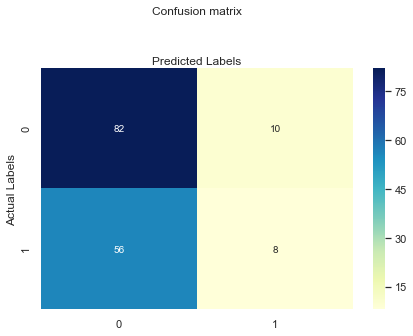

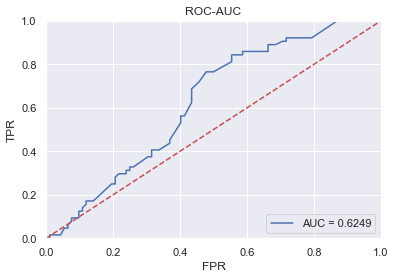

Accuracy: 0.576923076923
Precision: 0.444444444444
Recall: 0.125


In [368]:
pred = lr_pipeline(X_train, y_train, ['nsl', 'buyout'], X_test, y_test, solver='lbfgs')

[[82 10]
 [56  8]]


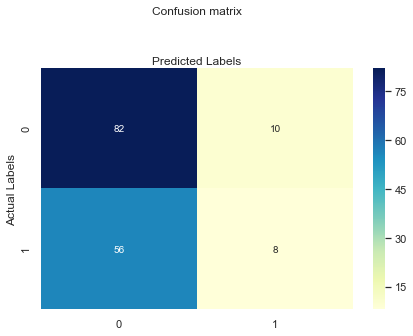

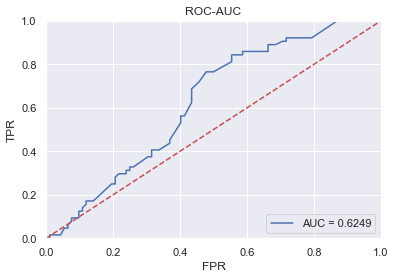

Accuracy: 0.576923076923
Precision: 0.444444444444
Recall: 0.125


In [369]:
pred = lr_pipeline(X_train, y_train, ['nsl', 'buyout'], X_test, y_test, solver='lbfgs')

[[72 20]
 [49 15]]


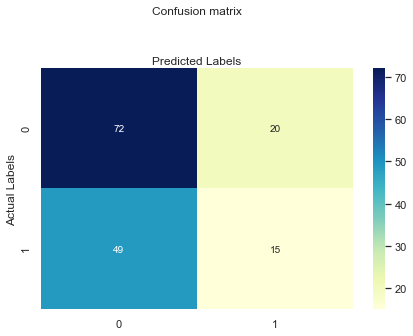

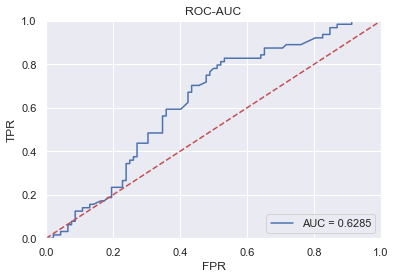

Accuracy: 0.557692307692
Precision: 0.428571428571
Recall: 0.234375


In [370]:
pred = lr_pipeline(X_train, y_train, ['fvl', 'buyout'], X_test, y_test, solver='lbfgs')

[[75 17]
 [49 15]]


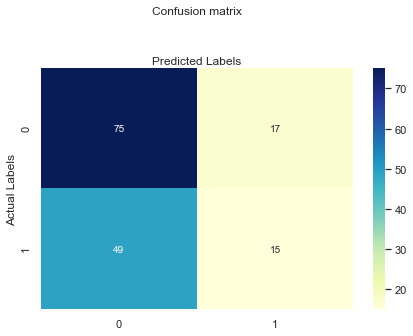

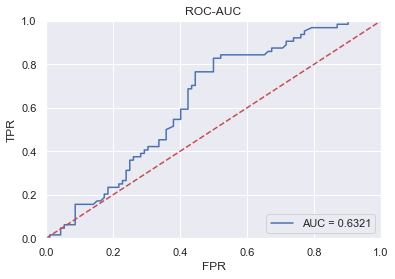

Accuracy: 0.576923076923
Precision: 0.46875
Recall: 0.234375


In [371]:
pred = lr_pipeline(X_train, y_train, ['capital', 'buyout'], X_test, y_test, solver='lbfgs')

### Inference
The logistic regression model with these features 'n_shares','face_value' is even as good as a random classifier. That could be seen from the ROC-AUC, which is 0.5  
The best logistic regression model is given by model trained with features 'capital' and 'buyout', with ROC-AUC as 0.63.

#### some extra work which I did:

Here, I basically tried to separate the classes based on probability but couldn't find the perfect threshold to split. Just leaving it here for the purpose of documenting the work done.

In [305]:
# instantiate the model


logreg = LogisticRegression()
logreg.fit(X_train[['capital', 'buyout']], y_train)
pred = logreg.predict(X_validate[['capital', 'buyout']])
predict_probabilities = logreg.predict_proba(X_validate[['capital', 'buyout']])
# changing the threshold based on a given probability.
# not used currently though
predict_mine = np.where(predict_probabilities > 0.56, 0, 1)
# predict_mine[:,0]

cnf_matrix = metrics.confusion_matrix(y_validate, predict_mine[:,0])
print(cnf_matrix)

In [264]:
prob = clf.predict_proba(X_test[PRED])

In [265]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

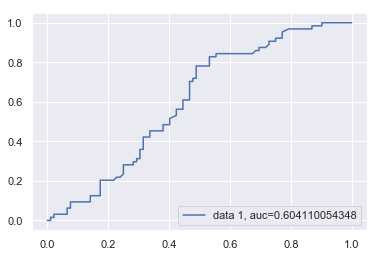

In [274]:
y_pred_proba = logreg.predict_proba(X_test[PRED])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Visualization of confusion matrix:

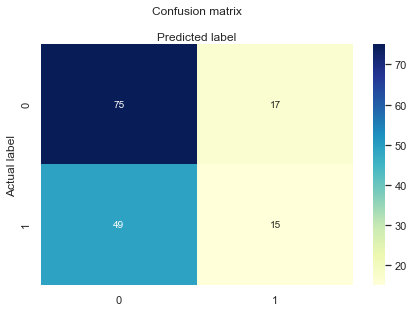

In [278]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [279]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

Accuracy: 0.576923076923
Precision: 0.46875
Recall: 0.234375


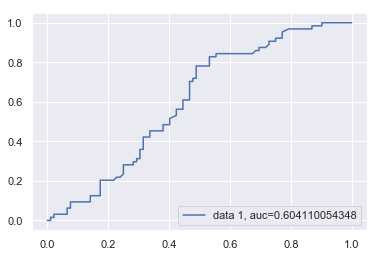

In [280]:
y_pred_proba = logreg.predict_proba(X_test[PRED])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### C

### Linear Discriminant Analysis

In [372]:
def lda_pipeline(X_train, y_train, PRED, X_test, y_test, solver='lsqr'):

    # PRED: features to be used for the model

    clf = LDA(solver=solver)
    clf.fit(X_train[PRED], y_train)
    clf.get_params()
    # predict
    pred = clf.predict(X_test[PRED])
    # confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test, pred)
    print(cnf_matrix)

    # visualize the confusion matrix
    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()

    plt.title('Confusion matrix', y=1.2)
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # plot roc-auc curve
    
    probabilities = t.predict_proba(X_test[PRED])
    pred_ = probabilities[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred_)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('ROC-AUC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()

    # print the metrics
    print("Accuracy:", metrics.accuracy_score(y_test, pred))
    print("Precision:", metrics.precision_score(y_test, pred))
    print("Recall:", metrics.recall_score(y_test, pred))

    return pred

[[92  0]
 [64  0]]


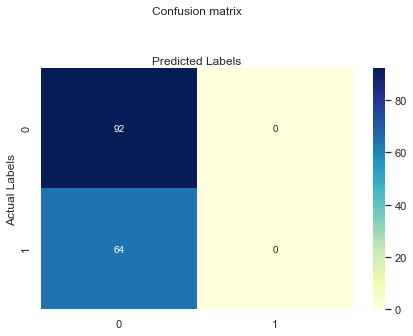

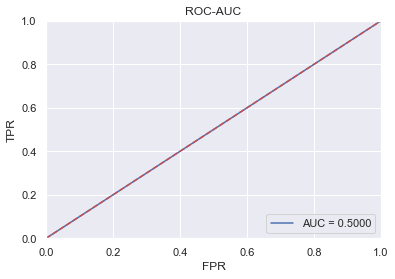

Accuracy: 0.589743589744
Precision: 0.0
Recall: 0.0


/opt/anaconda/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [376]:
pred = lda_pipeline(X_train, y_train, ['face_value', 'n_shares'], X_test, y_test, solver='lsqr')

[[73 19]
 [45 19]]


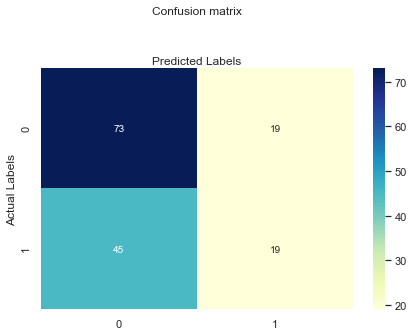

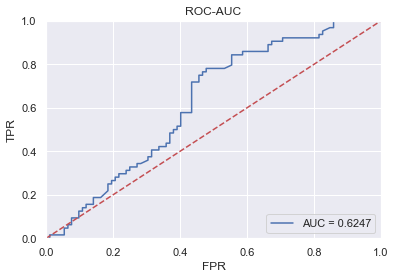

Accuracy: 0.589743589744
Precision: 0.5
Recall: 0.296875


In [373]:
pred = lda_pipeline(X_train, y_train, ['nsl', 'fvl'], X_test, y_test, solver='lsqr')

[[75 17]
 [49 15]]


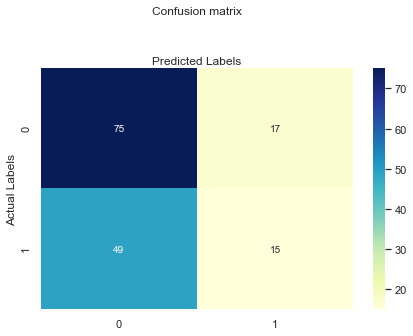

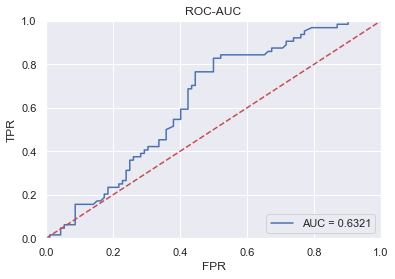

Accuracy: 0.576923076923
Precision: 0.46875
Recall: 0.234375


In [364]:
pred = lda_pipeline(X_train, y_train, ['capital', 'buyout'], X_test, y_test, solver='lsqr')

[[75 17]
 [49 15]]


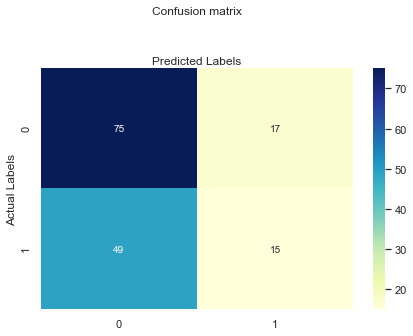

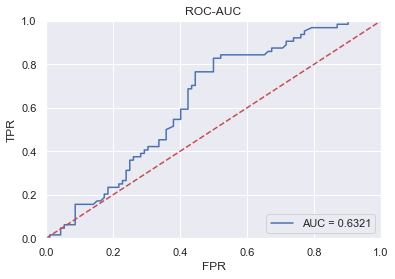

Accuracy: 0.576923076923
Precision: 0.46875
Recall: 0.234375


In [377]:
pred = lda_pipeline(X_train, y_train, ['capital', 'buyout'], X_test, y_test, solver='lsqr')

### inferences left. will come back in the end.

Advantages
Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

Disadvantages
Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

### d
Evaluate the performance of the classifiers using ROC curves on the training and on the validation set.  
already done as a part of b & c.  
  
The metrics used for evaluation are accuracy, precision and recall.  
For both the logistic regression as well as linear discriminant analysis, the worst model was the one with all features and none of those features were transformed in any way.  
  
The best model was the model where capital and buyout features were used. ROC-AUC were about .65 for both the models.

### e

Summarize your findings. How do the results differ between the training and the validation set? Which approach(es) perform(s) better on the validation set? What is are the reasons for this difference in performance? Which models are more interpretable?

reference:  
https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python  
scikit learn docs for solvers and metrics calculations